In [1]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, NumpyArrayIterator
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd

In [2]:
img_size = 128
batch_size = 32

### Load the data

In [4]:
def load_data():
    df = pd.read_csv("data/HAM10000_metadata.csv")
    df["label"] = df["dx"].apply(lambda dx: "malignant" if dx in ["akiec", "bcc", "mel"] else "benign") 
    df["image_id"] = df["image_id"].apply(lambda id: f"{id}.jpg")
    df = df.sample(frac=1, random_state=0)
    
    training_df = df[:7999]
    testing_df = df[8000:]
    
    training_data_generator = ImageDataGenerator(
        rescale=1.0/255,
        validation_split=0.125,
        rotation_range=360,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5, 1.0],
        zoom_range=[0.75, 1.0]
    )
    
    testing_data_generator = ImageDataGenerator(
        rescale=1.0/255
    )
    
    training_data = training_data_generator.flow_from_dataframe(
        dataframe= training_df,
        directory="data/images",
        x_col="image_id",
        y_col="label",
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="binary",
        classes=["benign", "malignant"],
        subset="training",
        shuffle=True
    )

    validation_data = training_data_generator.flow_from_dataframe(
        dataframe=training_df,
        directory="data/images",
        x_col="image_id",
        y_col="label",
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode="binary",
        classes=["benign", "malignant"],
        subset="validation",
        shuffle=True
    )

    test_data = testing_data_generator.flow_from_dataframe(
        dataframe=testing_df,
        directory="data/images",
        x_col="image_id",
        y_col="label",
        target_size=(img_size, img_size),
        class_mode="binary",
        classes=["benign", "malignant"]
    )

    return training_data, validation_data, test_data


### Creating the model
Explanation of why the model looks like it does

In [5]:
def create_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

    return model

### Training the model

In [10]:
def train_model(model, training_data, validation_data):
    history = model.fit(training_data, epochs=15, validation_data=validation_data)
    return history

### Evaluate the model

In [7]:
def evaluate_model(model, test_data):
    return None

Comments on the results

In [8]:
def save_model(model, path):
    model.save_weights(path)

### Putting it all together

In [11]:
model = create_model()
training_data, validation_data, test_data = load_data()
training_result = train_model(model, training_data, validation_data)
save_model(model, "./models/model_2")

Found 7000 validated image filenames belonging to 2 classes.
Found 999 validated image filenames belonging to 2 classes.
Found 2015 validated image filenames belonging to 2 classes.
Epoch 1/15


2022-03-04 12:34:54.801022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - ETA: 0s - loss: 0.5403 - accuracy: 0.7956

2022-03-04 12:35:45.313046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


219/219 [==============================] - 58s 263ms/step - loss: 0.5403 - accuracy: 0.7956 - val_loss: 0.4024 - val_accuracy: 0.8188
Epoch 2/15
219/219 [==============================] - 58s 263ms/step - loss: 0.4192 - accuracy: 0.8044 - val_loss: 0.4045 - val_accuracy: 0.8178
Epoch 3/15
219/219 [==============================] - 58s 264ms/step - loss: 0.4013 - accuracy: 0.8064 - val_loss: 0.3753 - val_accuracy: 0.8178
Epoch 4/15
219/219 [==============================] - 58s 264ms/step - loss: 0.4023 - accuracy: 0.8034 - val_loss: 0.3778 - val_accuracy: 0.8178
Epoch 5/15
219/219 [==============================] - 58s 265ms/step - loss: 0.3936 - accuracy: 0.8056 - val_loss: 0.3782 - val_accuracy: 0.8178
Epoch 6/15
219/219 [==============================] - 58s 264ms/step - loss: 0.3901 - accuracy: 0.8057 - val_loss: 0.3920 - val_accuracy: 0.8178
Epoch 7/15
219/219 [==============================] - 58s 264ms/step - loss: 0.3881 - accuracy: 0.8060 - val_loss: 0.3789 - val_accuracy: 0.8

PermissionDeniedError: /models; Read-only file system

In [ ]:
model = create_model()
model.load_weights("./models/model_1")
training_data, validation_data, test_data = load_data()

In [13]:
print(training_result.history)

{'loss': [0.5403140187263489, 0.4191751182079315, 0.40130019187927246, 0.4022868573665619, 0.39360153675079346, 0.39010676741600037, 0.38812100887298584, 0.38577592372894287, 0.38378921151161194, 0.3912222981452942, 0.3843631446361542, 0.3811449110507965, 0.38135582208633423, 0.3766160011291504, 0.3773989677429199], 'accuracy': [0.7955714464187622, 0.8044285774230957, 0.8064285516738892, 0.803428590297699, 0.805571436882019, 0.8057142496109009, 0.8059999942779541, 0.8067142963409424, 0.8062856793403625, 0.8051428198814392, 0.8065714240074158, 0.8062856793403625, 0.8068571090698242, 0.805571436882019, 0.8069999814033508], 'val_loss': [0.40239217877388, 0.4044511616230011, 0.37526485323905945, 0.37782904505729675, 0.3781692087650299, 0.3920169174671173, 0.3789091110229492, 0.36504560708999634, 0.3852030336856842, 0.3868916630744934, 0.3677709102630615, 0.36269745230674744, 0.36466142535209656, 0.3642929792404175, 0.3708357512950897], 'val_accuracy': [0.8188188076019287, 0.817817807197570

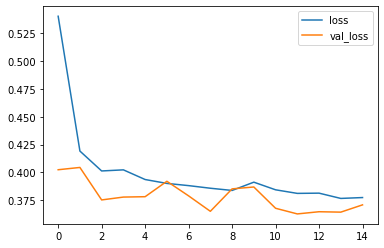

In [14]:
labels = ["loss", "val_loss"]
for label in labels:
    plt.plot(training_result.history[label])
plt.legend(labels)
plt.show()

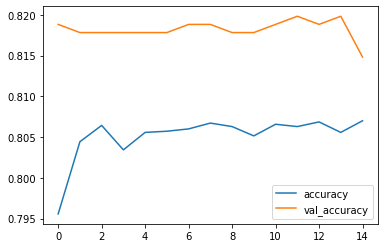

In [15]:
labels = ["accuracy", "val_accuracy"]
for label in labels:
    plt.plot(training_result.history[label])
plt.legend(labels)
plt.show()

In [16]:
predictions = model.predict(test_data)

2022-03-04 12:50:04.786674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [22]:
print(test_data._filepaths[0])
print(predictions[0, 0])

data/images/ISIC_0024742.jpg
0.38459924
